SEMANA 1

<font color="red">¿Autores?, ¿qué es? Esto es un informe y hay que cuidar estas cosas</font>

1.1. Eliminación de variables colineales

1.1.1
- Si las variables de entrada al modelo son linealmente dependientes, la matriz de covarianza no es invertible. Como consecuencia, el problema de regresión por mínimos cuadrados no está bien.definido.
- Para eliminar variables colineales puedes guiarte usando la matriz de
correlación. ¿Qué variables eliminarías usando este método?

Primero empezamos importanto los datos y las librerías necesarias:

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
data_train = pd.read_csv('dataset_housing_preprocesado_train.csv')
data_test = pd.read_csv('dataset_housing_preprocesado_test.csv')
pd.set_option('display.max_columns', None)

• Saca por pantalla la información estadística del modelo: desviación estándar de los coeficientes, valores p, intervalos de confianza de los coeficientes. Con una significancia estadística del 95%, ¿qué variables parece que no aportan
información?



• Saca por pantalla la información estadística del modelo: desviación estándar de los coeficientes, valores p, intervalos de confianza de los coeficientes. Con una significancia estadística del 95%, ¿qué variables parece que no aportan
información?



Eliminamos una columna problemática para poder representar la matriz de correlación

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


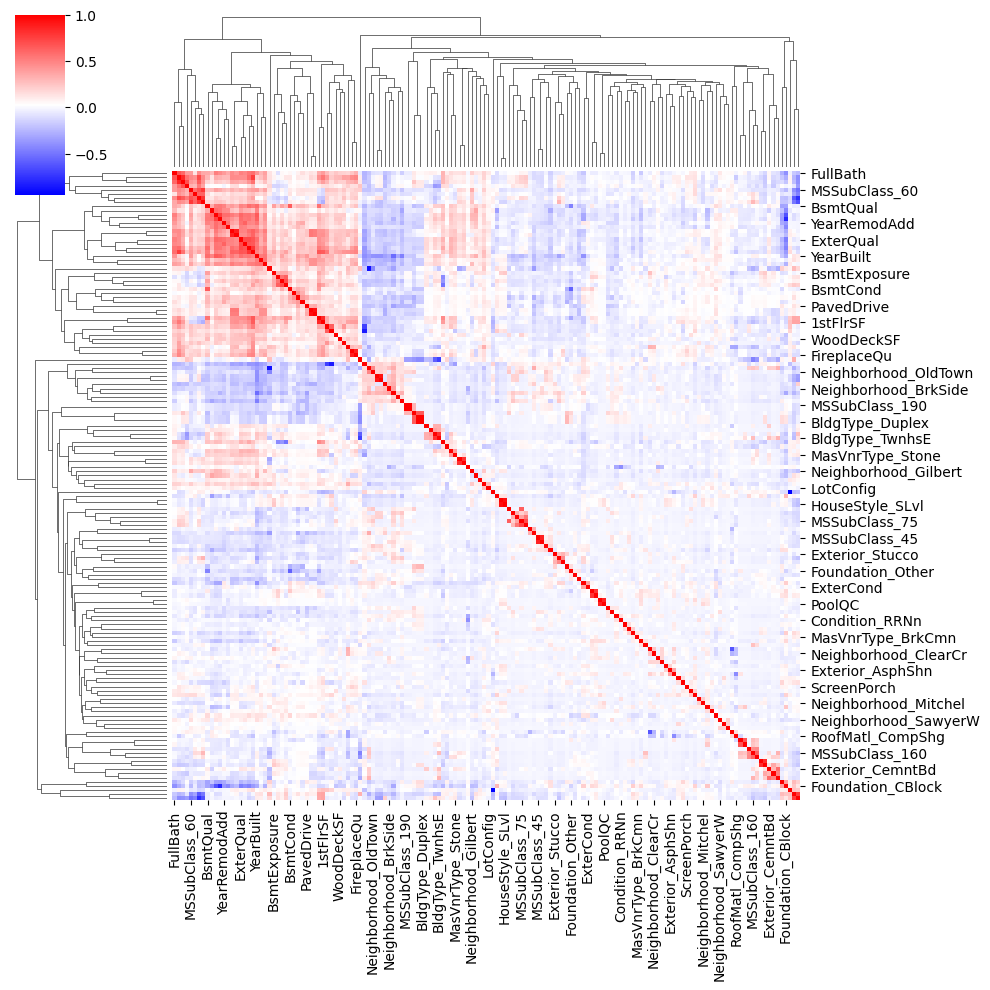

In [2]:
del(data_train['Exterior_CBlock'])
sns.clustermap(data_train.corr(), cmap='bwr')

#HAY MÁS COLUMNAS SIN DATOS, HACE FALTA ELIMINARLOS

Si una matriz tiene filas/columnas linealmente dependientes, al calcular el rango de esta matriz, nos dará el mismo valor si lo calculamos con estas filas/columnas linealmente dependientes presentes, que si lo calculamos habiéndolas eliminado. Esto nos lleva al siguiente apartado:

<font color="red">No tengo claro cuáles eliminaríais y por qué</font>

1.1.2
- Una manera de detectar cuántas variables independientes hay es calculando el rango de la matriz de covarianza:

        import numpy as np
        np.linalg.matrix_rank( X_train.cov() )

- Haz pruebas para ver que este método funciona: inventa un dataset con 10 filas y 2 columnas de datos donde una sea el doble que la otra. Chequea que el rango es 1. Haz el mismo análisis donde uno de los elementos de la segunda columna no sea el doble de la primera. Chequea que el rango ahora es 2. 

Generamos primero el dataset de 10 filas y 2 columnas donde la segunda es el doble que la primera

In [3]:
dataset1 = {
    'Col1' : [2,4,6,8,10,12,14,16,18,20],
    'Col2' : [4,8,12,16,20,24,28,32,36,40]
}
dataset1_df = pd.DataFrame(dataset1)
dataset1_df

,Col1,Col2
0,2,4
1,4,8
2,6,12
3,8,16
4,10,20
5,12,24
6,14,28
7,16,32
8,18,36
9,20,40


Comprobamos el rango de su matriz de covarianza:

In [4]:
np.linalg.matrix_rank(dataset1_df.cov())

1

Para el dataset donde un número de la segunda columna no es el doble que uno de la primera

In [5]:
dataset2 = {
    'Col1' : [2,4,6,8,10,12,14,16,18,20],
    'Col2' : [4,8,12,16,20,24,28,32,36,41]
}
dataset2_df = pd.DataFrame(dataset2)
dataset2_df

,Col1,Col2
0,2,4
1,4,8
2,6,12
3,8,16
4,10,20
5,12,24
6,14,28
7,16,32
8,18,36
9,20,41


In [6]:
np.linalg.matrix_rank(dataset2_df.cov()) #Vemos que rango tiene

2

Dataset con una columna que es la suma de las otras dos:

In [7]:
dataset3 = {
    'Col1' : [2,4,6,8,10,12,14,16,18,20],
    'Col2' : [4,8,12,16,20,24,28,32,36,41],
    'Col3' : [6,12,18,24,30,36,42,48,54,61]
}
dataset3_df = pd.DataFrame(dataset3)
dataset3_df

,Col1,Col2,Col3
0,2,4,6
1,4,8,12
2,6,12,18
3,8,16,24
4,10,20,30
5,12,24,36
6,14,28,42
7,16,32,48
8,18,36,54
9,20,41,61


In [8]:
np.linalg.matrix_rank(dataset2_df.cov()) #Rango

2

1.1.3
- Define ahora otra tercera columna que sea la suma de las dos primeras. Chequea que el rango sigue siendo 2. Finalmente, genera una matriz aleatoria de datos de N filas y M columnas (N>M) con:

        df = pd.DataFrame(np.random.rand(N,M))
        
- Chequea que para diferentes N y M, el rango es M. ¿Tiene sentido?

In [9]:
random1_df = pd.DataFrame(np.random.rand(20,10))
random2_df = pd.DataFrame(np.random.rand(17,8))
random3_df = pd.DataFrame(np.random.rand(93,37))
random4_df = pd.DataFrame(np.random.rand(8,4))
random5_df = pd.DataFrame(np.random.rand(100,50))

Veamos el rango que cada una de estas matrices:

In [10]:
np.linalg.matrix_rank(random1_df.cov()) #10 columnas

10

In [11]:
np.linalg.matrix_rank(random2_df.cov()) #8 columnas

8

In [12]:
np.linalg.matrix_rank(random3_df.cov()) #37 columnas

37

In [13]:
np.linalg.matrix_rank(random4_df.cov()) #4 columnas

4

In [14]:
np.linalg.matrix_rank(random5_df.cov()) #50 columnas

50

El rango de una matriz se refiere al número máximo de columnas o filas que son linealmente independientes. En el caso de que no haya niguna columna o fila de la matriz que sea linealmente dependiente, como el rango de una matriz no puede ser mayor al número de filas o de columnas, entonces el valor del rango será igual al valor más pequeño entre el número de filas y el número de columnas. En este caso estamos definiendo matrices de NxM, donde M < N, entonces como el rango no puede ser N porque si no sería superior al número de columnas que hay en las matrices, el rango es siempre igual a M.

1.1.4

- Implementa el algoritmo para reducir automáticamente el dataset a un conjunto de variables independientes 
- ¿Cuántas variables de entrada al modelo te quedan finalmente? Chequea que efectivamente son independientes (número variables = rango matriz de covarianza).

Para ver que se ha implementado correctamente el algoritmo, vamos a comprobar el número de columnas del dataset y el rango antes de modificarlo:

In [15]:
#Nº columnas
len(data_train.columns)

152

In [16]:
#Rango
np.linalg.matrix_rank(data_train.cov())

140

Implementamos el algoritmo:

In [17]:
data_train2 = data_train #Copia del dataset auxiliar
cols = data_train.columns #columnas del dataset
rank1 = np.linalg.matrix_rank(data_train.cov())

for col in cols:
    cols2 = cols.drop(col) #Eliminamos una columna para ver si cambia el rango
    data_train2 = data_train2[cols2] #Cogemos el dataset sin esa columna
    rank2 = np.linalg.matrix_rank(data_train2.cov()) #Hallamos el rango de ese datset
    if rank1 == rank2: #Si los rangos siguen igual, se elimina esa columna porque es linealmente dependiente
        cols = cols2
    else:
        data_train2 = data_train #si son distintos, esa columna es linealmente independiente y no se quita


data_train = data_train[cols] #Nos quedamos con las columnas linealmente independientes

Veamos el número de columnas del dataset y el rango después de aplicar el algoritmo para ver que son iguales:

In [18]:
#Nº columnas
len(data_train.columns)

140

In [19]:
#Rango
np.linalg.matrix_rank(data_train.cov())

140

1.2. Construcción de un primer modelo

1.2.1
- Construye un modelo de regresión lineal usando sklearn y calcula su coeficiente de determinación R2 en training y en test. ¿Hay sobreajuste?

Tomamos las columnas linealmnete independientes de test antes de hacer el modelo de regresión

In [20]:
del(data_test['Exterior_CBlock'])

In [21]:
data_test = data_test[cols]

Importamos la librería sklearn para la construcción del modelo:

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
#Dividimos los datos entre la variable objetivo/dependiente (y) y las variables independientes
x_train = data_train.drop('SalePrice', axis=1)
y_train = data_train['SalePrice']
x_test  = data_test.drop("SalePrice", axis=1)
y_test  = data_test["SalePrice"]

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

LinearRegression()

Calculamos los coeficientes de determinación R2:

In [25]:
model.score(x_train, y_train) #ESTA MEJOR

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

0.9424614967584222

In [26]:
model.score(x_test, y_test)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

0.8768548653214296

El SOBREAJUSTE se da cuando el modelo de regresión se ajusta demasiado a los datos de entrenamiento (training), incluso a los detalles y el ruido en los datos. Como consecuancia el coeficiente de determinación R2 en los datos de entrenamiento es alto, si embargo, cuando se aplica a nuevos datos (test), el modelo no generaliza bien, y por lo tanto se obtiene un R2 más bajo. En este caso el coeficiente de determinación es bastante alto tanto para training como para test, por tanto no hay sobreajuste significativo.

1.2.2
- Crea un scatter plot que enfrente el precio real de la casa con el precio estimado del modelo para los datos de training. Haz lo mismo para test. ¿Qué conclusiones extraes?


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

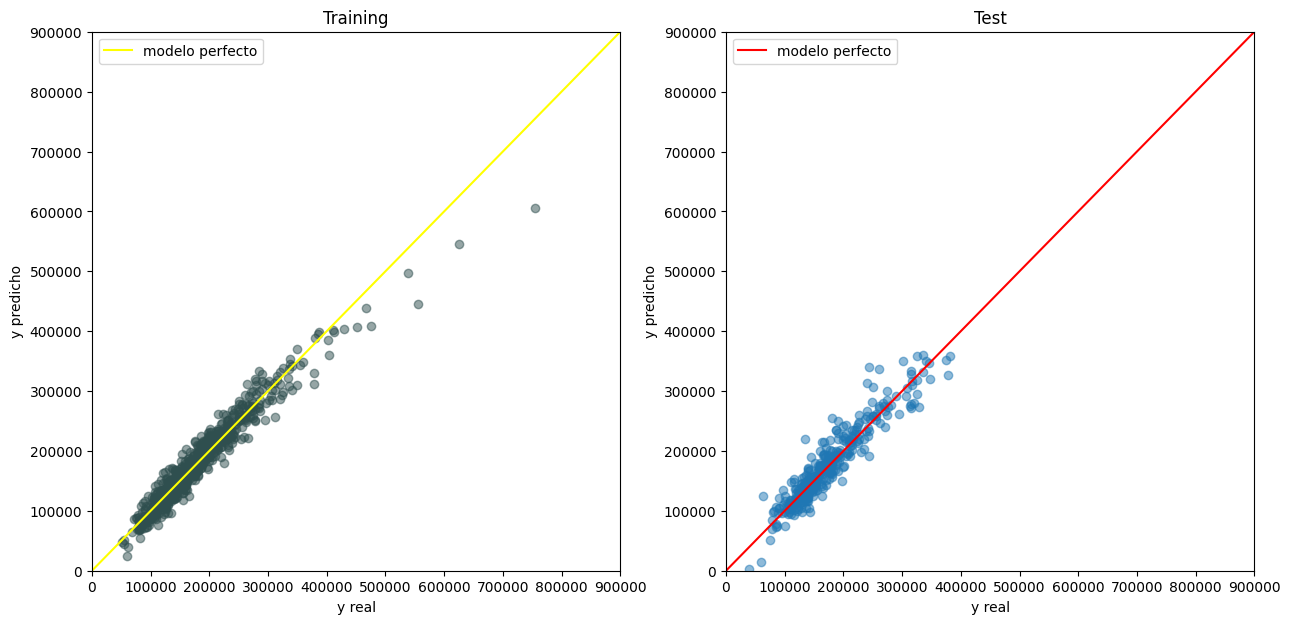

In [27]:
####CREO QUE SALE VACÍO PORQUE LA COLUMNA DE SALESPRICE ESTA VACIA
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(y_train, model.predict(x_train), "o", alpha=0.5, color = 'darkslategray')
aux = [0, 900000]
plt.plot(aux, aux, "r", label="modelo perfecto", color = 'yellow')
plt.xlim(aux)
plt.ylim(aux)
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.title('Training')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_test, model.predict(x_test), "o", alpha=0.5)
plt.plot(aux, aux, "r", label="modelo perfecto")
plt.xlim(aux)
plt.ylim(aux)
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.title('Test')
plt.legend();

En ambos gráficos se está comparando la calidad del modelo de regresión. Cuanto más cerca estén los puntos de la recta (que representa el modelo perfecto), más precisa es la predicción. A pesar de que en training haya algunos puntos más alejados de la recta que en test, la mayoría de estos puntos están muy próximos a la recta, por tanto el coeficiente de determinación en training daba tan próximo a 1, indicando que el modelo es casi perfecto. En cambio en test, la mayoría de los puntos están un poco más alejados de la recta, y como resultado su coeficinete de determinación R2 era menor al de training, indicando que el modelo en test es un poco peor. 

1.2.3
- Imprime por pantalla los coeficientes del modelo lineal ajustado. Nota: si model es el modelo ajustado, los coeficientes del modelo son model.coef_ y el término independiente es model.intercept_

In [28]:
print(f'Los coeficientes del modelo lineal ajustado son:\n{model.coef_}')

Los coeficientes del modelo lineal ajustado son:
[ 1.98310774e+01  1.43394341e+00  6.74551200e+02 -1.32667432e+03
 -9.25205327e+02 -5.09840585e+03  1.00473734e+04  6.06884698e+03
  4.18683880e+02  2.95788856e+01 -2.05587845e+04  5.38934070e+01
  8.42340621e+03 -1.38229301e+03  3.67702933e+02 -1.00582897e+04
  5.86359057e+03 -4.57590380e+02  3.46295713e+02 -1.37207305e+01
 -1.82676053e+01  4.24106233e+01 -3.38782436e+03  1.39384439e+03
 -8.13382118e+02  2.80243996e+03  2.44795820e+01  2.98723358e+00
  5.24245164e+01  3.20726434e+03  2.10339501e+03 -4.39138158e+03
 -2.00139652e+03 -5.00934845e+03 -6.55846646e+03  2.76513562e+03
  2.78975829e+02  3.54322909e+03  7.41922905e+03 -2.63601287e+03
 -1.33468285e+03  3.81337604e+03  1.14406386e+03  2.60932299e+03
 -5.33100309e+00  6.59532062e+03 -6.14270423e+03  2.98248556e+03
  6.55089097e+00  2.84130921e+01  9.07152461e+00  4.15998133e-01
  4.26622704e+01 -1.80924521e+01  8.79281691e+03 -3.34259154e+02
  1.11095662e-01 -6.61087217e+03 -7.74134

In [29]:
print(f'El término independiente es: \n {model.intercept_}')

El término independiente es: 
 -949831.6384475054


1.2.4
- Calcula las predicciones de tu modelo usando esos coeficientes (sin usar model.predict) y chequea que coinciden exactamente con las dadas por model.predict

Calculamos las prediccion del modelo (y = w'x + b), como resultado de multiplicar la matriz de los coeficientes con los datos de la variable independiente y sumarles el término independiente:

In [30]:
w = []
for i in range(x_train.shape[0]):
    w.append(model.intercept_ + np.dot(model.coef_,x_train.iloc[i]))
print(f'Las predicciones del modelo sin usar model.predict: \n {np.array(w)}')

Las predicciones del modelo sin usar model.predict: 
 [253022.23448361 181768.1443827  155194.64414101 282788.92764264
 142078.53852498  85872.32068631 132008.95108942 121751.75590561
 252138.00695973 223049.3608501  140753.64035344 188590.76672152
 118642.14053204 145997.7411473  146479.24520567 205982.88244292
 126740.82831959 195411.98013065 183314.93581962 313252.17053967
 146729.91322831  78283.75572409 170239.86168015 143244.1366871
 148101.70948112 145683.74045862 109570.08422156 179773.80195033
 121141.43215188 122659.92161605 200898.11610579 171214.40619739
 129057.04809604 221363.80705757 171421.36089471 369572.15959521
 106652.69909344 260874.43633987 215252.54707586  96284.29126429
  85789.32357539 170004.54601332 247409.02374973 107313.11572336
 181655.62894195  72334.31981151 130058.1302665  171071.02900374
 138310.71708766 117763.2309733  251779.67273699 170985.82029553
 286985.4312637  149091.0418854   48519.27125411 103756.13900021
  70934.89514938  86111.33848387 2494

Con model predict

In [31]:
predicciones = model.predict(x_train) #CREO QUE HAY QUE HACERLO CON ESTO
print(f'Las predicciones usando model.predict:\n{predicciones}')

Las predicciones usando model.predict:
[253022.23448361 181768.1443827  155194.64414101 282788.92764264
 142078.53852498  85872.32068631 132008.95108942 121751.75590561
 252138.00695973 223049.3608501  140753.64035344 188590.76672152
 118642.14053204 145997.7411473  146479.24520567 205982.88244292
 126740.82831959 195411.98013065 183314.93581962 313252.17053967
 146729.91322831  78283.75572409 170239.86168015 143244.1366871
 148101.70948112 145683.74045862 109570.08422156 179773.80195033
 121141.43215188 122659.92161605 200898.11610579 171214.40619739
 129057.04809604 221363.80705757 171421.36089471 369572.15959521
 106652.69909344 260874.43633987 215252.54707586  96284.29126429
  85789.32357539 170004.54601332 247409.02374973 107313.11572336
 181655.62894195  72334.31981151 130058.1302665  171071.02900374
 138310.71708766 117763.2309733  251779.67273699 170985.82029553
 286985.4312637  149091.0418854   48519.27125411 103756.13900021
  70934.89514938  86111.33848387 249467.4774365  189

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

A continuación veamos si son iguales:

In [32]:
np.array_equal(np.around(np.array(w),3),np.around(predicciones,3)) #REDONDEAMOS AL TERCER DECIMAL PARA PODER HACER LA COMPARACIÓN 

True

1.2.5
- ¿Se cumple la suposición de que los residuos siguen una distribución gaussiana?


Para verlo podemos realizar un histograma con los residuos:

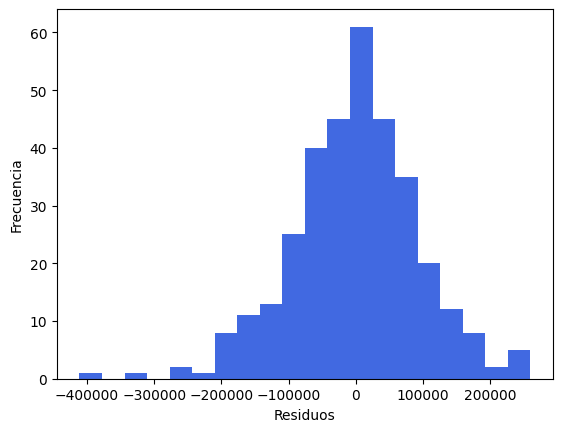

In [33]:
residuals = y_test - y_train
plt.hist(residuals, bins=20, color='royalblue')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

Viendo este histograma se puede determinar que los residuos sí siguen una distribución gaussiana

1.2.6.
- A continuación vamos a explorar el efecto de transformar de manera no lineal el target usando la transformación logarítmica. Primero haz un histograma del target sin transformar, y compáralo con el transformado. ¿Qué observas?

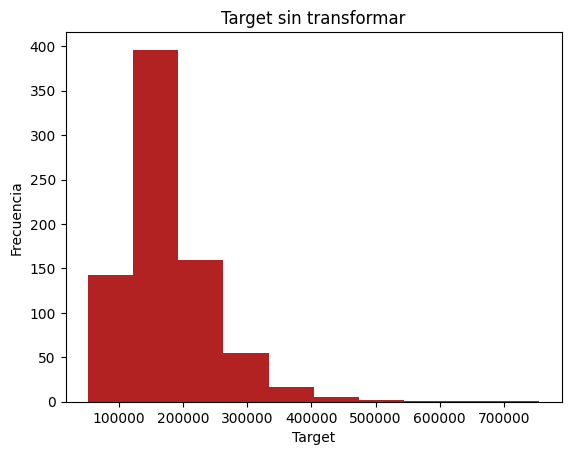

In [34]:
plt.hist(y_train, color= 'firebrick')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.title('Target sin transformar')
plt.show()

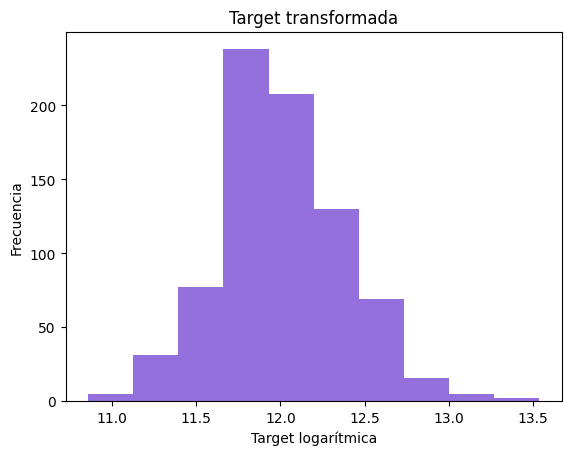

In [35]:
plt.hist(np.log(y_train), color= 'mediumpurple')
plt.xlabel('Target logarítmica')
plt.ylabel('Frecuencia')
plt.title('Target transformada')
plt.show()

Se observa que al aplicar una transformación logarítmica a la variable target esta se aproxima más a una distribución gaussiana 

1.2.7.
- A continuación crea un modelo lineal que prediga esta variable target transformada. Las predicciones del modelo tendrán que ser convertidas de nuevo a dólares usando la transformada exponencial (np.exp) ya que el R2 siempre hay que medirlo en la escala original de la variable target (dólares). ¿Ha mejorado tu modelo? Nota: ahora no podrás calcular el R2 de tu modelo usando model.score ya que entonces medirías el R2 del logaritmo del precio. Lo haremos de la siguiente forma: después de aplicar la transformada exponencial a las predicciones, usa la función r2_score: from sklearn.metrics import r2_score.

In [36]:
model2 = LinearRegression()
model2.fit(x_train, np.log(y_train))

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

LinearRegression()

In [37]:
#Target Transformada
ytest = np.log(y_test)
ytrain = np.log(y_train)

In [38]:
#R2 Training
r2_score(np.exp(ytrain), np.exp(model2.predict(x_train))) #training

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

0.9706299000102848

In [39]:
#R2 Test
r2_score(np.exp(ytest), np.exp(model2.predict(x_test)))

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

0.929604641933564

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

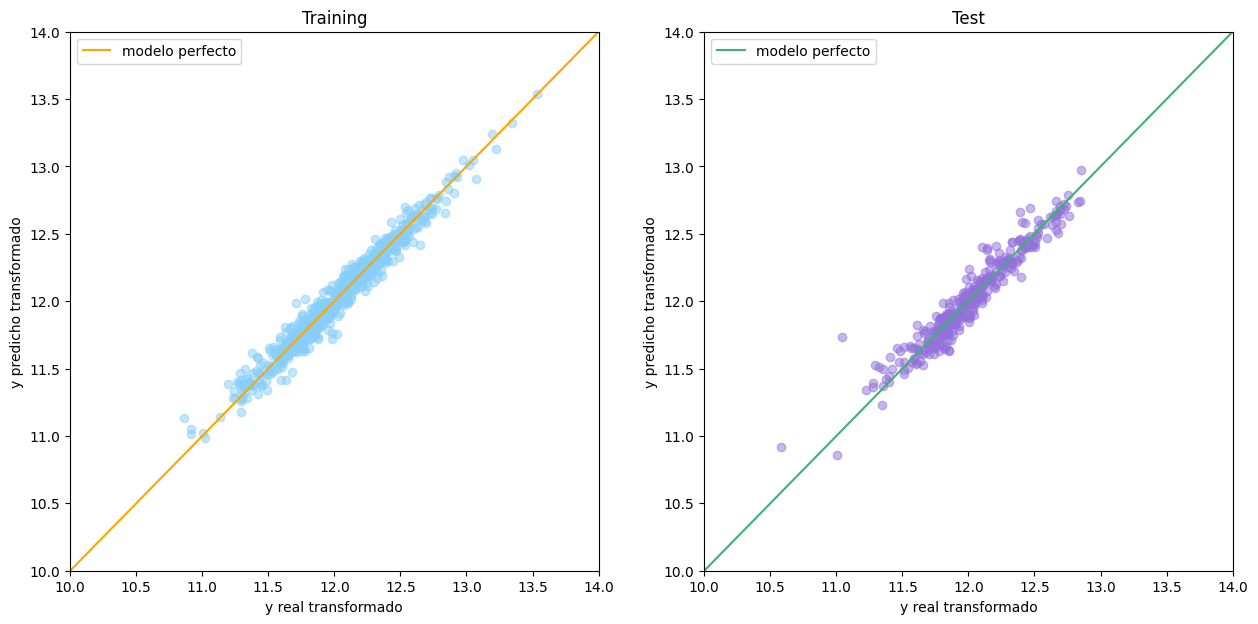

In [40]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(ytrain, model2.predict(x_train), "o", alpha=0.5, color = 'lightskyblue')
aux = [10,14] #Cambiamos el intervalo para que se ajuste a la transformación logarítmica
plt.plot(aux, aux, "r", label="modelo perfecto", color = 'orange')
plt.xlim(aux)
plt.ylim(aux)
plt.xlabel("y real transformado")
plt.ylabel("y predicho transformado")
plt.title('Training')
plt.legend()

plt.subplot(1,2,2)
plt.plot(ytest, model2.predict(x_test), "o", alpha=0.5, color = 'mediumpurple')
plt.plot(aux, aux, "r", label="modelo perfecto", color = 'mediumseagreen')
plt.xlim(aux)
plt.ylim(aux)
plt.xlabel("y real transformado")
plt.ylabel("y predicho transformado")
plt.title('Test')
plt.legend();

In [41]:
predicciones2 = model2.predict(x_train) #CREO QUE HAY QUE HACERLO CON ESTO
print(f'Las predicciones usando model.predict para la variable taget transformada:\n{predicciones2}')

Las predicciones usando model.predict para la variable taget transformada:
[12.46379294 12.02599801 11.96548373 12.58667445 11.87272625 11.65358901
 11.71225443 11.73623088 12.39724498 12.2960082  11.87585626 12.06792184
 11.71170441 11.97061334 11.8553627  12.22287156 11.80312757 12.19073168
 12.14098943 12.64039086 11.9397459  11.37834666 12.02555591 11.81651019
 11.889555   11.8450762  11.67829186 12.0074764  11.62782371 11.68793925
 12.22848367 11.9629575  11.81936614 12.31734769 12.04424221 12.76484737
 11.66868826 12.37811865 12.28772291 11.59081264 11.39416124 11.96998901
 12.3822246  11.60000458 12.09406123 11.39656052 11.80383478 12.08648693
 11.76584824 11.68974194 12.45599749 12.0197423  12.62785194 11.94476394
 11.13130713 11.54924249 11.37433916 11.38541985 12.42133465 12.14267606
 11.82946458 12.2391417  12.13490268 12.17503766 12.69307636 11.72859565
 12.08142733 12.67590826 11.84810605 12.58323433 11.59997118 12.65411351
 11.49377784 12.1504752  11.62549076 12.22573168 

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Como se puede apreciar, tanto en los coeficientes de determinación R2 como en los scatter plot, ha habido una gran mejora en el modelo tras aplicar la transformación logarítmica. Los coeficcientes R2 tanto de training como de test son más próximos a 1 que antes, y los puntos en ambos gráficos están muy próximos a la recta. Se sigue viendo que el modelo con los datos de entrenamiento (training) es más preciso que con los datos de prueba (test), pero el escaso sobreajuste que podría haber se ha reducido aún más. Todo esto se debe a que la transformación logarítmica ha ayudado a 'linealizar' aún más la relación entre  las variables predictoras y la variable objetivo, haciendo la regresión lineal más precisa.

SEMANA 2


Paso 1: Construcción de un modelo lineal con librería statsmodels


• Construye un modelo de regresión para el dataset anterior usando la libreríastatsmodels. ¿Obtiene los mismos coeficientes que sklearn? ¿Los coeficientes de determinación son iguales? ¿Es el QQ-plot el esperado para un modelo de regresión lineal?



Al construir el modelo de regresión lineal con statsmodels miramos que el coeficiente de determinación de model es del 0.991. Esto también tiene que ver con el hecho de que nuestros datos ya han pasado por un preporocesado anterior, aunque es posible que esté un poco inflado debido a que no hemos quitado aún las variables no significativas.

Los coeficientes son similares a sklearn, con valores absolutos pequeños, pero cuánto más grandes son estos más error puede llegar a haber entre ellos. Por ejemplo, los coeficientes de statsmodels y skelarn en LotShape son 1136 y 674.55,repectivamente. 

Como al ejecutar el QQPlot se visualiza el trazado ascendente de los residuos ordenados, que conforman una clara línea, podemos confirmar que es la gráfica que esperábamos para el modelo de regresión lineal. La única pega son resiudos más altos, que se alejan de la recta. Esto quiere decir que la regresión lineal no se ajusta tanto para los valores con mayor error cuadrado.



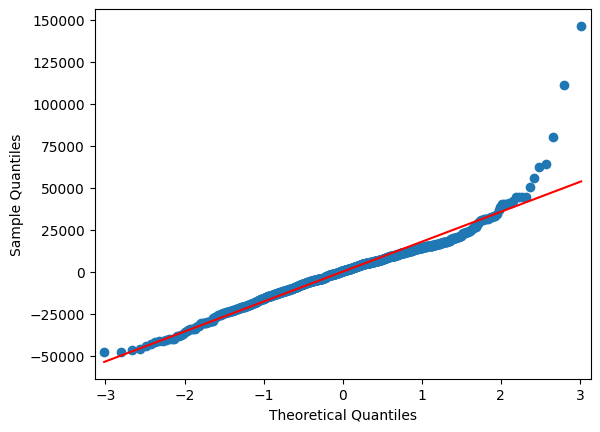

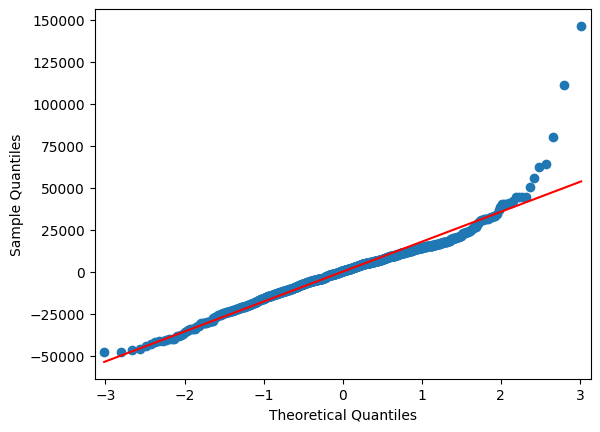

In [42]:
x=sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()

sm.qqplot(model.resid, line='s')
    

• Saca por pantalla la información estadística del modelo: desviación estándar de los coeficientes, valores p, intervalos de confianza de los coeficientes. Con una significancia estadística del 95%, ¿qué variables parece que no aportan
información?



In [43]:
summary=model.summary()
df_summary = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]

max=df_summary['P>|t|'].max()
        
fila_con_max_pvalue = df_summary.loc[df_summary['P>|t|'] == max]

C:\Users\juanj\AppData\Local\Temp\ipykernel_1816\1369686703.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_summary = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]


Paso 2: Selección de variables con statsmodels

• Implementa el siguiente algoritmo de eliminación de variables usando
statsmodels:

    1- Construye modelo con variables cols
    2- Detecta qué variables parece que no aportan información de acuerdo al
    criterio de los valores P. Si no encuentras ninguna, fin del algoritmo. Si encuentras una o varias, toma la que tenga un valor P mayor y quítala de cols. Vuelve a 1

Creamos un bucle del que saldremos solo cuando al coger el mayor de los p-valores de las variables que quedan en nuestro modelo sea menor que 0.05.
Si es mayor, pasamos a identificar el nombre de la variable de este p-valor máximo y metemos el nombre en una lista de columnas que quitamos del modelo. Después tenemos que volver a construir el modelo porque cambian los p-valores y cogemos otro máximo, y así hasta salir del bucle, que se parará cuando coja el p-valor de 0,0495 (en el summary sale que es 0,05 pero es una aproximación).

In [44]:

cols=x_train
x=sm.add_constant(cols)
model = sm.OLS(y_train, cols).fit()


#así podemos cargar en un Dataframe la segunda tabla que se nos despliega al hacer display(df.summary())


lista_cols_out=[]

while True:

    p_values=model.pvalues
    
    max=p_values.max()
    
    if max<=0.05:  #caso en el que ya no tengamos ningun pvalor mayor que el nivel de significación
        
        break
    
    lista_cols_out.append( model.pvalues.idxmax())
    model = sm.OLS(y_train, sm.add_constant(cols.drop(lista_cols_out, axis=1))).fit()
    
    
summary=model.summary() #nuevo modelo con las cols que no aportan información de acuerdo a los p-valores.
df_summary = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]
print('Num cols restantes:',len(df_summary)) #50
display(summary)

    

Num cols restantes: 50


C:\Users\juanj\AppData\Local\Temp\ipykernel_1816\4047511390.py:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_summary = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     219.4
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:00:07   Log-Likelihood:                -8781.2
No. Observations:                 781   AIC:                         1.766e+04
Df Residuals:                     731   BIC:                         1.790e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.178e+06   1.06e+05    -11.145      0.000   -1.39e+06    -9.7e+05
LotArea                  1.5029      0.162      9.284      0.000       1.185       1.821
OverallQual           1.082e+04   1009.914     10.712      0.000    8835.138    1.28e+04
OverallCond           6493.2009    773.386      8.396      0.000    4974.878    8011.524
YearBuilt              552.0166     54.680     10.095      0.000     444.668     659.365
RoofMatl_CompShg     -1.513e+04   5808.220     -2.604      0.009   -2.65e+04   -3722.924
MasVnrArea              56.5612      6.520      8.675      0.000      43.761      69.361
ExterQual             8584.9904   2164.186      3.967      0.000    4336.230    1.28e+04
BsmtCond             -9999.1154   1768.074     -5.655      0.000   -1.35e+04   -6528.008
BsmtExposure          5892.2309    842.653      6.992      0.000    4237.923    7546.539
BsmtFinSF2             -12.7129      4.619     -2.752      0.006     -21.781      -3.645
BsmtUnfSF              -20.3526      2.139     -9.517      0.000     -24.551     -16.154
TotalBsmtSF             48.0180      4.603     10.433      0.000      38.982      57.054
2ndFlrSF                23.1225      5.645      4.096      0.000      12.039      34.206
GrLivArea               48.7169      4.808     10.132      0.000      39.277      58.157
BedroomAbvGr         -4834.9542   1314.190     -3.679      0.000   -7414.991   -2254.918
KitchenQual           3782.4453   1798.763      2.103      0.036     251.089    7313.802
Functional            3647.7720   1177.171      3.099      0.002    1336.733    5958.811
Fireplaces            7356.6693   2326.456      3.162      0.002    2789.337    1.19e+04
FireplaceQu          -2272.8729    852.944     -2.665      0.008   -3947.385    -598.361
GarageType           -1036.1430    494.228     -2.096      0.036   -2006.419     -65.867
GarageYrBlt_gt_1990   8000.5848   2490.276      3.213      0.001    3111.640    1.29e+04
ScreenPorch             36.5289     12.438      2.937      0.003      12.110      60.948
Condition_Feedr      -5722.5414   2909.063     -1.967      0.050   -1.14e+04     -11.426
Condition_RRAe       -2.977e+04   7692.123     -3.870      0.000   -4.49e+04   -1.47e+04
Exterior_BrkFace      1.747e+04   3899.614      4.479      0.000    9810.168    2.51e+04
Exterior_CemntBd       1.36e+04   3759.998      3.617      0.000    6219.661     2.1e+04
Exterior_Stucco       1.679e+04   5968.486      2.814      0.005    5075.205    2.85e+04
MSSubClass_45         1.806e+04   8466.520      2.133      0.033    1436.467    3.47e+04
MSSubClass_80        -2.077e+04   1.05e+04     -1.972      0.049   -4.14e+04     -94.444
MSZoning_RL           9399.7034   2608.443      3.604      0.000    4278.770    1.45e+04
Neighborhood_ClearCr -3.245e+04   5962.807     -5.442    

• ¿Con cuántas variables te quedas usando este algoritmo? ¿Qué R2 tiene en training y en test el nuevo modelo? ¿Es mejor que el modelo sin seleccionar variables?


Nos quedan 50 variables y un coeficiente de determinación de 0.93 con x_train, que antes de la selección de variables era de 0.991. ¿A qué se puede deber esto? Seguramente a que el modelo OLS eliminó variables que no eran estadísticamente significativas pero que contribuían a un R2 más alto, por ejemplo, tal vez se eliminaron 2 variables que estuviesen algo correlacionadas, y al quitar ambas disminuyes el coeficiente R2. El R2 para x_test es de 0.944144521.

In [45]:
x=sm.add_constant(x_train)
model_sin_selec_var = sm.OLS(y_train, x_train).fit()

print(model.rsquared,model_sin_selec_var.rsquared)



0.9363216731958053 0.9913531190091671


Paso 3: Selección de variables con regularización

• Crea un modelo lineal usando regresión Lasso usando la clase LassoCV del módulo linear_model de sklearn. ¿Qué variables tienen peso 0 en el modelo construido? ¿es esto consistente con lo que has visto en el paso 1? ¿Qué R2 en training y test tiene tu modelo? ¿es mejor respecto a los anteriores?
 Importante: para usar regresión Lasso o Ridge, las variables de entrada al modelo y la variable target se deben estandarizar.

En el modelo construido con x_train encontramos 42 variables con un peso 0.0 en el modelo. Creemos que sí puede tener sentido, ya que, aunque esperábamos muchos más coeficientes con un peso de cero absoluto, hay muchos pesos con valores muy cercanos a cero. Las variables con estos valores tendrán un impacto mínimo en los datos, y por tanto serían eliminadas en el modelo OLS.

El coeficiente R2 para train es de 0.93607 y 0.943053 para test. Los coeficientes de x_train con los modelos OLS y Lasso son casi iguales, que ambos son 0.936 y los siguientes decimales ya son diferentes. Este dato nos hace pensar que es consistente tener 42 variables con peso 0, ya que si los coeficientes fuesen incorrectos  los coeficientes de determinación de Lasso serían menores.



In [46]:
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler

xscaler = StandardScaler() ; xtscaler=StandardScaler()
x_train_scaled = xscaler.fit_transform(x_train) ; x_test_scaled = xtscaler.fit_transform(x_test)
#xscaler = StandardScaler(data_test)
#x_test_scaled = xscaler.fit_transform(x_test)

ymean, ystd = y_train.mean(), y_train.std()
y_train_scaled = (y_train - ymean) / ystd 
y_test_scaled = (y_test - ymean) / ystd
model = LassoCV()
model.fit(x_train_scaled, y_train_scaled)
model_test=LassoCV()
model_test.fit(x_test_scaled, y_test_scaled)
print('coef R2 de train',model.score(x_train_scaled, y_train_scaled))
print('coef R2 de test',model_test.score(x_test_scaled, y_test_scaled))
# Accede a los coeficientes del modelo Lasso
coeficientes = model.coef_

# Imprime los coeficientes junto con el nombre de las variables si tienes un DataFrame

vars_0=0 #vairables que son 0
for i, coef in enumerate(coeficientes):
    if abs(coef) == 0.0:
        vars_0 += 1
    print(f"Variable {i+1}: {coef}")

print(vars_0)





C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

coef R2 de train 0.936065039888586
coef R2 de test 0.943564056026289
Variable 1: 0.007946812471808593
Variable 2: 0.10495090391772426
Variable 3: 0.007210197296199198
Variable 4: -0.0
Variable 5: -0.006584883493810619
Variable 6: -0.0024363185676723725
Variable 7: 0.19335320742891782
Variable 8: 0.08131931922201234
Variable 9: 0.10041114108917054
Variable 10: 0.0072530298802548675
Variable 11: -0.0285455951516634
Variable 12: 0.10678120829771648
Variable 13: 0.06431425282142166
Variable 14: -0.0
Variable 15: 0.0
Variable 16: -0.051335118675894915
Variable 17: 0.08053832727079373
Variable 18: 0.0019484028066113128
Variable 19: -0.0
Variable 20: -0.01814140056454692
Variable 21: -0.09143919639122441
Variable 22: 0.20001613802605814
Variable 23: -0.0
Variable 24: 0.012445242530289103
Variable 25: 0.0
Variable 26: 0.0
Variable 27: 0.030439710875898317
Variable 28: -0.0
Variable 29: 0.38145439533786285
Variable 30: 0.014477394001710421
Variable 31: 0.0018497312484377921
Variable 32: -0.0012

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

• Repite el punto anterior usando regresión Ridge

Esta vez haciendo el modelo con Ridge nos encontramos que no hay ningún coeficiente con peso 0, pero esto es normal: a diferencia de Lasso, que utiliza la regularización L1 y tiene la propiedad de forzar algunos coeficientes a ser exactamente cero, Ridge utiliza la regularización L2, que penaliza los coeficientes sin eliminarlos por completo. Los coeficientes no se suelen anular por completo a no ser que aumentemos alpha : de hecho, cuanto mayor mayor es alfa mayor es la regularización y menores serán los coeficientes.

En cuanto a los coeficientes R2, en x_train es de 0.94244854108293460 y x_test 0.9563741000674629, por lo que se ajustan mejor nuestros datos al modelo Ridge en comparación al resto de modelos.

In [47]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(x_train_scaled, y_train_scaled)
r2 = ridge_model.score(x_train_scaled, y_train_scaled)
ridge_model_t = Ridge(alpha=1.0)  
ridge_model_t.fit(x_test_scaled, y_test_scaled)
r2t=ridge_model_t.score(x_test_scaled, y_test_scaled)

print("Coeficiente de Determinación de train", r2)
print("Coeficiente de Determinación de test", r2t)

coeficientes=ridge_model.coef_

vars_0=0 #variables que son 0
for i, coef in enumerate(coeficientes):
    if abs(coef) == 0.0:
        vars_0 += 1
    print(f"Variable {i+1}: {coef}")

print(vars_0)



Coeficiente de Determinación de train 0.9424485410829346
Coeficiente de Determinación de test 0.9558503423287897
Variable 1: 0.008912292546360648
Variable 2: 0.1111378131070638
Variable 3: 0.005406202578406395
Variable 4: -0.010249461845220513
Variable 5: -0.010603952129331583
Variable 6: -0.016942449145938794
Variable 7: 0.18275838515805337
Variable 8: 0.0932746038055267
Variable 9: 0.15886042141810824
Variable 10: 0.008659042587385151
Variable 11: -0.03778253686451962
Variable 12: 0.12141359707650147
Variable 13: 0.06397677388229743
Variable 14: -0.006719147779648538
Variable 15: 0.0046795616258589546
Variable 16: -0.07468830686802223
Variable 17: 0.08510303552754354
Variable 18: -0.011835970749203461
Variable 19: 0.004040019204840276
Variable 20: -0.030249095907332515
Variable 21: -0.10528388582273075
Variable 22: 0.23514181767069928
Variable 23: -0.005787816022702583
Variable 24: 0.01827838681579509
Variable 25: -0.0025721867702924125
Variable 26: 0.013330735701261441
Variable 27: 

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea